<a href="https://colab.research.google.com/github/stemgene/Computer-Vision-Projects/blob/main/01_timm_transformer_infer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.bilibili.com/video/BV1na41177B2/?spm_id_from=333.788&vd_source=81884c519d60bbdad4b6fd87d340415f

timm = pytorch image model

In [1]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.0 MB/s eta 0:00:00


In [2]:
import timm
import torch
from torchvision import transforms as T
from PIL import Image
import json
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


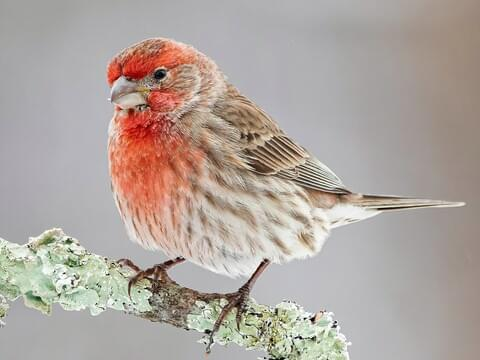

In [10]:
image = Image.open("/gdrive/My Drive/Programming/Computer Vision/wudaokou/datasets/house_finch.jpg")
image

In [12]:
print(type(image), image.size, image.format, image.mode, image.getbands())

<class 'PIL.JpegImagePlugin.JpegImageFile'> (480, 360) JPEG RGB ('R', 'G', 'B')


In [3]:
timm.list_models("swin*")

['swin_base_patch4_window7_224',
 'swin_base_patch4_window12_384',
 'swin_large_patch4_window7_224',
 'swin_large_patch4_window12_384',
 'swin_s3_base_224',
 'swin_s3_small_224',
 'swin_s3_tiny_224',
 'swin_small_patch4_window7_224',
 'swin_tiny_patch4_window7_224',
 'swinv2_base_window8_256',
 'swinv2_base_window12_192',
 'swinv2_base_window12to16_192to256',
 'swinv2_base_window12to24_192to384',
 'swinv2_base_window16_256',
 'swinv2_cr_base_224',
 'swinv2_cr_base_384',
 'swinv2_cr_base_ns_224',
 'swinv2_cr_giant_224',
 'swinv2_cr_giant_384',
 'swinv2_cr_huge_224',
 'swinv2_cr_huge_384',
 'swinv2_cr_large_224',
 'swinv2_cr_large_384',
 'swinv2_cr_small_224',
 'swinv2_cr_small_384',
 'swinv2_cr_small_ns_224',
 'swinv2_cr_small_ns_256',
 'swinv2_cr_tiny_224',
 'swinv2_cr_tiny_384',
 'swinv2_cr_tiny_ns_224',
 'swinv2_large_window12_192',
 'swinv2_large_window12to16_192to256',
 'swinv2_large_window12to24_192to384',
 'swinv2_small_window8_256',
 'swinv2_small_window16_256',
 'swinv2_tiny_wi

In [13]:
model = timm.create_model("swin_base_patch4_window7_224", pretrained=True)
model

SwinTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
    (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (layers): Sequential(
    (0): SwinTransformerStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): SwinTransformerBlock(
          (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (attn): WindowAttention(
            (qkv): Linear(in_features=128, out_features=384, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=128, out_features=128, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
            (softmax): Softmax(dim=-1)
          )
          (drop_path1): Identity()
          (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=128, out_features=512, bias=True)
            (act): GELU(approximate='none')
            (

首先查看最后一层，output是1000，即此模型的预训练作用在ImageNet的1000分类上，除此之外该模型还有几个特点：

* 1000 分类
* 图像size = 224
* 需要转换成tensor
* batch作为input，即4D的tensor [batch, c, h, w]

In [8]:
eff_ = timm.create_model("efficientnet_b0", pretrained=True)
eff_

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
      

## 输入预处理，将input转换成符合上述条件的input

### Resize

等比例缩放，即 h/w的值不变，341/256 = 480/360

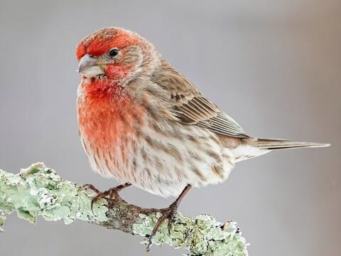

In [14]:
T.Resize(256)(image)

In [15]:
T.Resize(256)(image).size

(341, 256)

### Crop

应该是先resize，再crop。否则会丢失信息

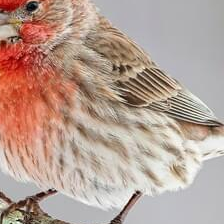

In [16]:
# 针对原图像进行crop
T.CenterCrop(224)(image)

可见如果一上来针对原图进行crop，会丢失信息

### 通过组合`compose`进行图像优化

In [19]:
trans_ = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(timm.data.IMAGENET_DEFAULT_MEAN, timm.data.IMAGENET_DEFAULT_STD)
])

可以查看`timm.data.IMAGENET_DEFAULT_MEAN`, `timm.data.IMAGENET_DEFAULT_STD`


In [18]:
timm.data.IMAGENET_DEFAULT_MEAN, timm.data.IMAGENET_DEFAULT_STD

((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

In [20]:
transed_image = trans_(image)

In [21]:
print(type(transed_image), transed_image.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


### 转换成batch

如果只有一张图片，可以直接通过`unsqueeze(i)`来增加一个batch维度。`unsqueeze(i)`中的数字代表插入维度的位置，如`unsqueeze(0)`的结果是[1, 3, 224, 224]，而`unsqueeze(1)`的结果是[3, 1, 224, 224]

In [25]:
batch_input = transed_image.unsqueeze(0)
batch_input.shape

torch.Size([1, 3, 224, 224])

## 推理及预测过程

In [27]:
with torch.no_grad():
    output = model(batch_input)

探索一下输出

In [28]:
output.shape

torch.Size([1, 1000])

In [29]:
output.argmax()

tensor(12)

即对应着第13个label

In [31]:
output.sum(dim=1)  # 按行加和

tensor([13.5689])

其和并不为1，即输出不是概率分布，而是softmax之前的logits

In [32]:
output.topk(5)

torch.return_types.topk(
values=tensor([[9.1681, 4.4957, 2.1622, 1.7529, 1.6927]]),
indices=tensor([[12, 10, 11, 15, 86]]))

In [36]:
probs = torch.nn.Softmax(dim=1)(output)
probs.topk(3)

torch.return_types.topk(
values=tensor([[8.9124e-01, 8.3330e-03, 8.0790e-04]]),
indices=tensor([[12, 10, 11]]))

In [38]:
with open("/gdrive/My Drive/Programming/Computer Vision/wudaokou/datasets/imagenet_labels.json") as f:
    labels = json.load(f)

In [39]:
labels[:5]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark']

In [40]:
len(labels)

1000

In [41]:
labels[probs.argmax()]

'house finch'